# Integration and Visualization
- YOUR NAME:
- YOUR VUNetID:

(If you do not provide your NAME and VUNetID we will not accept your submission.)

**To hand in: one zip file, containing...**
- this file, with completed tasks
- the ontology you made in the previous assignment
- an ontology you found on the web
- an integrated ontology (`mapping.ttl`)

## Task 1 (20 Points):  Integrating ontologies in Protégé
Take the ontology you built for Module 4 (let’s call it ontology A), and find either a fellow student with a similar ontology or an ontology on the web from a similar domain. That will be our ontology B. 

Create an empty ontology in Protégé (ontology C), and import both ontologies. 

Define at least 6 mappings as following:

-    1 mapping between a class from A and a class from B using rdfs:subClassOf 
-    1 mapping between a class from A and a class from B using owl:equivalentClass
-    1 mapping between a property from A and a property from B using rdfs:subPropertyOf
-    1 mapping between a property from A and a property from B using either owl:equivalentProperty, owl:disjointProperty, owl:inverseOf, or owl:propertyChainAxiom
-    1 mapping between an individual from A and an individual from B using owl:differentFrom
-    1 mapping between an individual from A and an individual from B using owl:sameAs 

The combined ontology should be **consistent**.

Save the ontology as Turtle, where the filename is ‘`mapping.ttl`’

**Submit all three ontologies together with this assignment, leaving preserved the original file names of the ontologies**

In [ ]:
print(open('mapping.ttl').read())

## Task 2 (10 Points):  Explain your mapping

Please explain and motivate the mapping you made in the previous question in a few sentences in the text field below :

...

## Task 3 (20 points):  Integration with SPARQL

Before starting this task, make sure to watch the demo given in Lecture 10.

Follow these instructions to complete this task:

1.    Open your GraphDB workbench.
2.    Create a new repository called assignment-5, and import your ontology A into this repository (you must have at least provided the Ontology A in the previous question).
3.    Given your initial ontology A and the domain it covers, find on the Web a public SPARQL endpoint that provides similar or complementary information (e.g. DBpedia, Wikidata, LinkedGeoData).
4.    From the SPARQL interface in GraphDB, write a SELECT query that you can use to retrieve this complementary or similar information from the SPARQL endpoint.
5.    Now also from the SPARQL interface in GraphDB, write an INSERT query to define mappings between the retrieved data and your ontology A. These mappings can be between classes in your ontology and classes in the retrieved data (e.g. using rdfs:subClassOf), between instances (e.g. using owl:sameAs), or between instances and classes (e.g. using rdf:type).
6.    After creating the mappings in GraphDB, export your RDF data, and check in Protégé if your ontology is consistent.
7.    If your ontology is still consistent, paste here both the SELECT query (step 4) and the INSERT query (step 5) that created these mappings. Otherwise, go back to Step 4.

SELECT:
```sparql
SELECT ...
```

INSERT:
```sparql
INSERT ...
```

## Task 4 (20 point). Pandas Plotting

For the next few tasks you are going to use the `%%sparql` magic function which runs your query and which returns the results in a [Pandas DataFrame](https://pandas.pydata.org). This makes it easy to do further data processing on the results. First, however, we need to install the necessary dependencies:

In [2]:
%pip install matplotlib pandas ipython-sparql-pandas
import pandas
import matplotlib

# run `sparql?` in a cell for documentation
%load_ext ipython_sparql_pandas

Make sure that `vuDataset.ttl` is loaded in GraphDb as the `repo-vu` repository, and run the cell below.

**Be aware that nothing (eg Python code or comments) must precede the `%%sparql` keyword for it to work well, and that nothing must come after the query**


In [3]:
%%sparql http://localhost:7200/repositories/repo-vu -s courseload
PREFIX vu: <http://example.org/vu/>

SELECT ?teacher (COUNT(*) as ?courses) {
    ?teacher vu:teaches ?o .
} GROUP BY ?teacher

teacher  courses
0  http://example.org/vu/stefan        5
1   http://example.org/vu/frank        3
2     http://example.org/vu/joe        1

<AxesSubplot:ylabel='courses'>

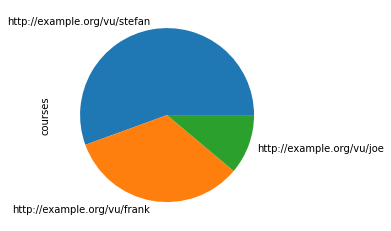

In [4]:
# Pandas visualization: https://pandas.pydata.org/docs/user_guide/visualization.html
courseload.set_index('teacher', inplace=True)
courseload['courses'].plot.pie()

## Task 4a (10 points): Make a horizontal bar chart (with suitable labels and title) from the `courseload` dataframe

In [5]:
# your code here

## Task 4b (10 points): Write a new SPARQL query for DBpedia and create an interesting chart from it

In [ ]:
# your code here

## Task 5 (10 point). Pandas styling
Below is some code that shows a colored table.

**Task:** Update the query and code below to add a new column with the percentage of the area of the country that is water.
The background color of this column must depend on its value: it should be greener if more of the country is land, and bluer if more of the country is water.

In [7]:
%%sparql http://dbpedia.org/sparql/ -q -s dbpedia_countries
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX yago: <http://dbpedia.org/class/yago/>

SELECT DISTINCT ?name ?area_100k_km2 ?giniCoefficient WHERE {
    ?country 
        a yago:WikicatMemberStatesOfTheEuropeanUnion ;
        dbo:area ?area ; # area is stated in m^2
        dbo:giniCoefficient ?giniCoefficient ;
        rdfs:label ?name. 
    
    BIND (ROUND(?area/100000000000) AS ?area_100k_km2)
    FILTER(LANG(?name) = 'en')
}
ORDER BY DESC(?area_100k_km2)
LIMIT 50

In [8]:
# Styling: https://pandas.pydata.org/docs/user_guide/style.html
# Using CSS Hue-Saturation-Level colors: https://www.w3schools.com/colors/colors_hsl.asp

def gini_color(gini):
    return f'background: hsl({100 - gini}, 100%, 50%)' 

dbpedia_countries.style \
    .applymap(gini_color, subset=(slice(None), "giniCoefficient"))

# Task 6 (20 points): Folium Map

Below is some code that makes a map. 

**Task:** Update the query and code below to make the markers (circles) scale with the population of the capital (but keep it readable!)

Tip: use the auto-complete functionality of http://query.wikidata.org

In [9]:
%%sparql http://query.wikidata.org/sparql -q -s capitals
SELECT ?capitalLabel ?coords WHERE {
    ?country
        wdt:P463 wd:Q458 ; # member of: European Union
        wdt:P36 ?capital . # capital: ?capital
        
    ?capital 
        wdt:P625 ?coords . # coordinate location: ?coords
    
    # Using Wikidata-only label service
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

In [10]:
# %pip install folium

In [11]:
import folium
# Extract latitude and longitude from coordinates in Well-Known Text (WKT) format
capitals_coords = capitals.join(capitals.coords.str.extract('Point\((?P<lon>\S+) (?P<lat>\S+)\)').astype(float))

middle = [capitals_coords['lat'].mean(), capitals_coords['lon'].mean()]
m = folium.Map(location=middle, zoom_start=4)
for _, row in capitals_coords.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius= 20,
        popup= row['capitalLabel'],
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",
    ).add_to(m)

m

The result should look a bit like this:

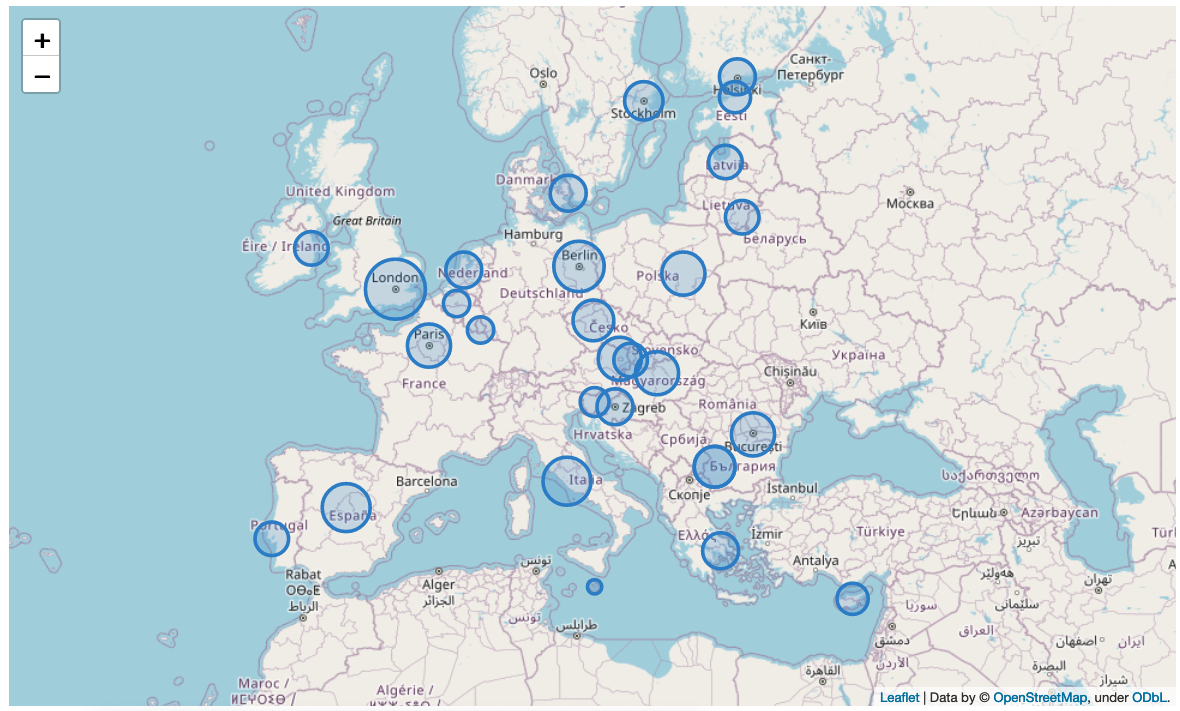